In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
%%html
<a href="Intro.html" target="_self">Introduction</a>&nbsp&nbsp&nbsp
<a href="CF.html" target="_self">Collaborative Filtering</a>&nbsp&nbsp&nbsp
<a href="MF.html" target="_self">Matrix Factorization</a>&nbsp&nbsp&nbsp
<a href="HB.html" target="_self">Hybrid Model</a>&nbsp&nbsp&nbsp
<a href="Con.html" target="_self">Conclusion</a>&nbsp&nbsp&nbsp

# Matrix Factorization for recommender systems

- [1.1 Implementation of Matrix factorization for recommender systems](#Implementation-of-Matrix-factorization-for-recommender-systems)
- [1.2 Data cleaning](#Data-cleaning-:)
- [1.3 Tuning of parameters](#Tuning-of-parameters:)
- [1.4 Results](#Results:)

** Introduction **

Matrix factorization technique is a recommender system technique that discovers and utilises the latent features underlying the interactions between the users and movies. As the name suggests, the technique is to factorize the matrix into two or more matrices such that you multiply them to get the original matrix. 
In our project, we have a group of users and set of movies. Given that users have rated some movies, we would like to predict the how the users would rate other movies that they have not yet rated so that we can recommend movies to them. Mathematically, we have a matrix where the rows are the users_ids and the columns are movie_ids. Each cell is either empty(missing entries) or has the rating given by the user to the movie. We would like to build a model to fill in the missing entries such that values are consistent with the existing entries in the matrix.

The idea behind using matrix factorization to solve this problem is that there should be some latent features that determine how a user rates a particular movie. For example, two users can give high ratings to a movie if it is an action movie, a genre preferred by both the users or if the movie has certain actors/actresses liked by the users.
All the data we have in matrix is ratings given the user for a movie and no other features about either the user or movie. So if we discover these latent features, we should be able to predict ratings for a movie with respect to a user because the features associated with the user should match with the features associated with the movie.

In the procedure of discovering latent features, we make an assumption that the number of features are less than the number of movies and the users. If the number of features are same as the number of users, then each user has a unique feature, then there is no point in making predictions since a user would not be interested in movies rated high by other users. Same is the case for movies if the number of features are same as the number of movies.

** Mathematical Explanation **
We have a set of $|N|$ users and $|M|$ movies. Let $R$ of size $|N| x |M|$ be the  matrix that contains the ratings of movies given by the users. We assume that there are $|K|$ no. of latent features. Our task it to find  two matrices $P$($|N| x |K|$) and $Q$($|M| x |K|$) such that their product approximates $R$:

$$ R \approx P x Q^T = \hat{R} $$

Each row of P would represent the strength of associations between a user and the features. Similarly, each row of Q would represent the strength of associations between a movie and the features. To get the prediction of a rating of a movie $d_j$ by user $u_i$, we calculate the dot product of  the two vectors corresponding to $u_i$ and $d_j$.:

$$\hat{r_{ij}} = p_i^Tq_j = \sum\limits_{k=1}^{K}p_{ik}q_{kj} $$.


**Model ** Our aim is to find such matrices $P$ and $Q$. We follow the following gradient descent approach. We initialize the two matrices with random values, and calculate how their product is different from $R$ and try to minimize the difference iteratively, aiming to find a local minima. The difference is the squared error between the actual rating and the estimated rating for each user-movie pair which has non-empty value.

$$ e_{ij}^2 = (r_{ij} - \hat{r_{ij}})^2 =  (r_{ij} - \sum\limits_{k=1}^{K}p_{ik}q_{kj}) ^2 $$

We differentiate the above equation with respect to $p_{ik}$ and $q_{kj}$ since we need to update these values:

$$ \frac{\partial }{\partial p_{ik}} e_{ij}^2 =  -2 (r_{ij} - \hat{r_{ij}})* (q_{kj}) = -2e_{ij}q_{kj}$$
$$ \frac{\partial }{\partial q_{kj}} e_{ij}^2 =  -2 (r_{ij} - \hat{r_{ij}})* (p_{ik}) = -2e_{ij}p_{ik}$$

Once we have the gradient, we can update the values of $p_{ik}$ and $q_{kj}$ using the  following update rules:
$$ p_{ik}^{'} =  p_{ik} - \alpha *\frac{\partial }{\partial p_{ik}} e_{ij}^2 = p_{ik}  + 2\alpha e_{ij}q_{kj}$$
$$ q_{kj}^{'} =  q_{kj} - \alpha *\frac{\partial }{\partial q_{kj}} e_{ij}^2 = q_{kj}  + 2\alpha e_{ij}p_{ik}$$

Here $\alpha$ is the step size of approaching the minimum. Step size is an important parameter to be tuned in gradient descent. If we choose too large step size, there is a risk of oscillating around the minimum, if the step size is too small, the rate is convergence is low.  Our data is huge and it takes long to tune the parameter using cross validation.

Using the above update rules, we can then iteratively perform the operation until the error converges to its minimum. We can check the overall error as calculated using the following equation and determine when we should stop the process.

$$ E = \sum\limits_{u_i,d_j, r_{ij} \in T}e_{ij}  = \sum\limits_{u_i,d_j, r_{ij} \in T} (r_{ij} - \sum\limits_{k=1}^{K}p_{ik}q_{kj}) ^2$$

** Regularization **
As observed in datascience, overfitting a common problem and we introduce regularization to this method to avoid overfitting. To introduce regularization, we add a parameter $\beta$ and modify the squared error as

$$e_{ij}^2 = (r_{ij} - \sum\limits_{k=1}^{K}p_{ik}q_{kj}) ^2  + \frac{\beta}{2}\sum\limits_{k=1}^{K}(||P||^2 + ||Q||^2)$$

The new update rules are :
$$ p_{ik}^{'} =  p_{ik} - \alpha *\frac{\partial }{\partial p_{ik}} e_{ij}^2 = p_{ik}  + \alpha (2e_{ij}q_{kj} - \beta p_{ik})$$
$$ q_{kj}^{'} =  q_{kj} - \alpha *\frac{\partial }{\partial q_{kj}} e_{ij}^2 = q_{kj}  + \alpha (2e_{ij}p_{ik} - \beta q_{kj})$$



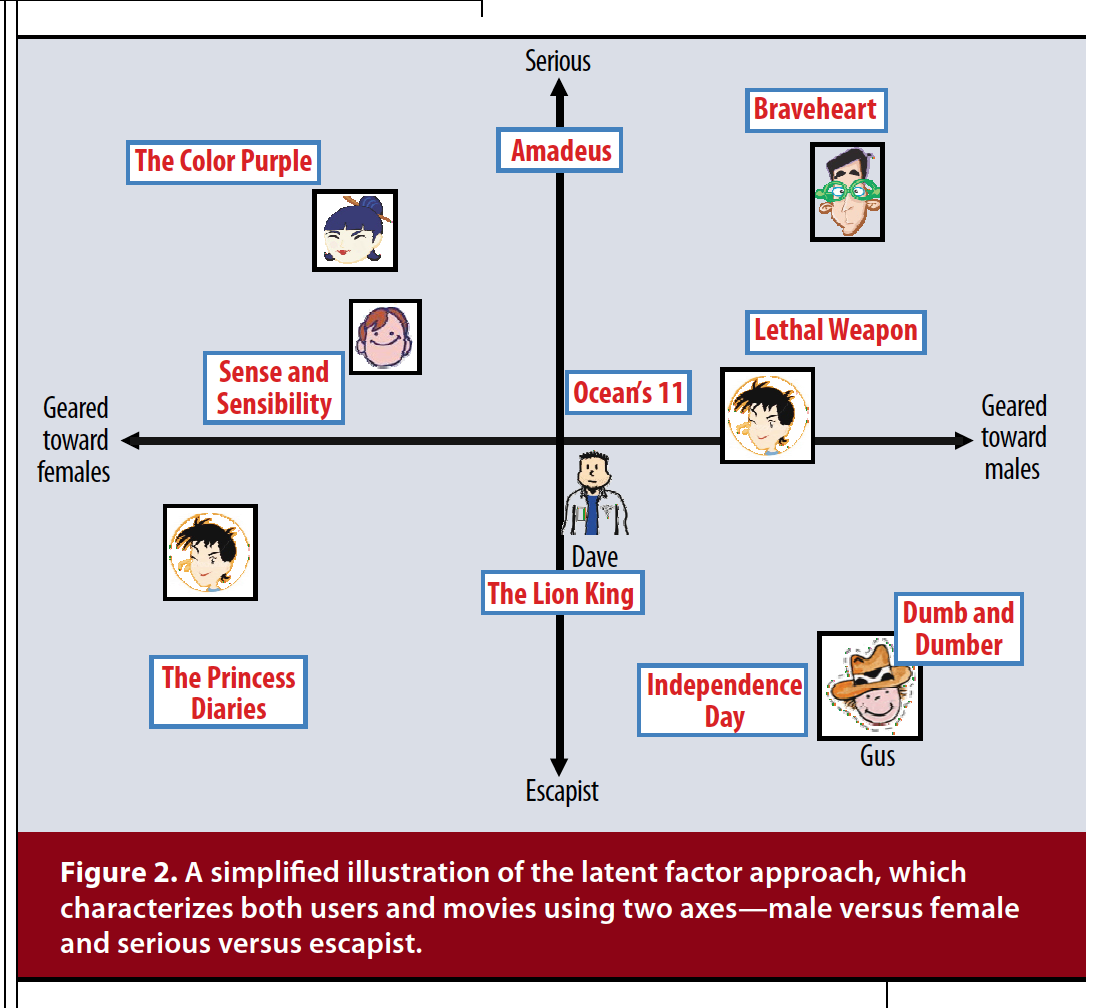

In [1]:
from IPython.display import Image
from IPython.display import display
z = Image(filename='Image1.png', width = 500, height = 500) 
display(z)


# Implementation of Matrix factorization for recommender systems

The dataset we use for matrix factorization is compressed dataset with 3 columns: movieID, revirewerID and rating.
Here is the sample of the dataset.

In [34]:
# importing required modules 
import pandas as pd
import numpy as np

In [2]:
# The dataset we use for matrix factorization is compressed dataset with 3 columns: movieID, revirewerID and rating.
# Here is the sample of the dataset.
data = pd.read_csv('subset.csv')[["movieID", "reviewerID", "rating"]]
data.head()

,movieID,reviewerID,rating
0,0005019281,ADZPIG9QOCDG5,4.0
1,0005019281,A35947ZP82G7JH,3.0
2,0005019281,A3UORV8A9D5L2E,3.0
3,0005019281,A1VKW06X1O2X7V,5.0
4,0005019281,A3R27T4HADWFFJ,4.0


In [5]:
# no. of entries in the dataset 
print "The shape of the dataset ", data.shape

The shape of the dataset  (1697533, 3)


# Data cleaning :

Since the dataset we have has 1.6 million entries, its difficult to train our model with this huge dataset on local machines. Moreover, there are many users who have rated few movies (say 3 or less). Similarly, there are movies that have been rated by very users (say 3 or less). So we select top 1000 users who have rated the maximum no. of movies and select top 1000 movies rated my top users.

In [6]:
# grouping the data by reviewerID
data_order = data.groupby('reviewerID').count()
# selecting top 1000 users
data_order = data_order.sort_values('movieID',ascending=False)
data_order.head(n=1000)
data_order.index[:1000].values
users_selected = data_order.index[:1000].values
data_users_selected = data[data['reviewerID'].isin(users_selected)]
print "The shape of the reduced dataset ", data_users_selected.shape


The shape of the reduced dataset  (317908, 3)


In [8]:
# selecting most rated movies
# grouping the data by movieID
data_order2 = data.groupby('movieID').count()
data_order2 = data_order2.sort_values('reviewerID',ascending=False)
data_order2.head(n=1000)
data_order2.index[:1000].values
movies_selected = data_order2.index[:1000].values

data_users_selected = data[data['reviewerID'].isin(users_selected)]
data_movies_users_selected = data_users_selected[data['movieID'].isin(movies_selected)]

print "The shape of the reduced dataset ", data_movies_users_selected.shape
data_movies_users_selected.head()

The shape of the reduced dataset  (61542, 3)


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


,movieID,reviewerID,rating
522,0310263662,A3EE0H0NWQ9QVL,5.0
526,0310263662,A32JKNQ6BABMQ2,3.0
531,0310263662,A1VQBHHXIKHIGS,1.0
535,0310263662,A2PV6GK1HV54Y9,4.0
540,0310263662,A1GSR7RGCG1QYZ,3.0


In [10]:
# further cleaning 
# removing from top 1000 users who have rated less than 3 movies

#grouping by reviewerID
grouped = data_movies_users_selected.groupby('reviewerID')
users = []
for user in data_movies_users_selected['reviewerID'].unique():
    if grouped.get_group(user).shape[0] < 3: 
        users.append(user)

criterion = data_movies_users_selected['reviewerID'].map(lambda x: x not in users)
data_movies_users_selected_new = data_movies_users_selected[criterion]
print "The shape of the final dataset used in training ",  data_movies_users_selected_new.shape

The shape of the final dataset used in training  (61525, 3)


Creating matrix of users and movies where each cell represents rating given by the user in the row to the movie in the column

In [10]:
# creating matrix of users and movies where each cell represents rating given by  
# the user in the row to the movie in the column
rp = data_movies_users_selected_new_test.pivot_table(columns=['movieID'],index=['reviewerID'],values='rating')
rp.head(n= 10)
# NaN represents empty values

movieID,0310263662,0767002652,076780192X,0767802470,0767802519,0767802624,0767802659,0767805267,0767811100,0767824571,...,B00H9KKGTO,B00H9L26AA,B00HEPC0TS,B00HEPDGKA,B00HEPE6MM,B00HHYF570,B00HLTD3ZW,B00HNGZHDE,B00JA3RPAG,B00JAQJMJ0
reviewerID,,,,,,,,,,,,,,,,,,,,,
A10175AMUHOQC4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A103KNDW8GN92L,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A106016KSI0YQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A106YXO3EHVD3J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,3.0,3.0,NaN,NaN,NaN
A10H47FMW8NHII,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,5.0,4.0,NaN,4.0,NaN,4.0,4.0,NaN,5.0
A10ODC971MDHV8,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10Q8NIFOVOHFV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A11ED8O95W2103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A11PTCZ2FM2547,3.0,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# since there are many empty values in the matrix, we fill them with 0 so that they can be handled mathematically
rp =rp.fillna(0)


In [12]:
#
# An implementation of matrix factorization
#

###############################################################################

"""
@INPUT:
    R     : a matrix to be factorized, dimension N x M
    P     : an initial matrix of dimension N x K
    Q     : an initial matrix of dimension M x K
    K     : the number of latent features (rank of the matrix)
    steps : the maximum number of steps to perform the optimisation
    alpha : the learning rate
    beta  : the regularization parameter
@OUTPUT:
    the final matrices P and Q
"""
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    e = e + pow(R[i][j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * ( pow(P[i][k],2) + pow(Q[k][j],2) )
        if e < 0.001:
            break
    return P, Q.T

###############################################################################

In [ ]:
# matrix factorization with K = 2
R = rp
R = np.array(R)
R = R[:1000,:1000]
N = len(R)
M = len(R[0])
K = 2 # no. of latent features
P = np.random.rand(N,K)
Q = np.random.rand(M,K)
nP, nQ = matrix_factorization(R, P, Q, K)

# reconstructred matrix from product of decomposed matrices
Rhat =  np.dot(nP, nQ.T)
# calculating RMSE for the model
R2 = 0 # var to store RMSE value
N = 0  # var to calculate the no. of non-empty values in matrix

for i in range(985):
    for j in range(1000):
        if(R[i][j]!=0):
            R2+= np.square((R[i][j]- Rhat[i][j]))
            N+=1
RMSE2 = np.sqrt(R2/N)

In [ ]:
# matrix factorization with K = 3
R = rp
R = np.array(R)
R = R[:1000,:1000]
N = len(R)
M = len(R[0])
K = 3 # no. of latent features
P = np.random.rand(N,K)
Q = np.random.rand(M,K)
nP, nQ = matrix_factorization(R, P, Q, K)

# reconstructred matrix from product of decomposed matrices
Rhat =  np.dot(nP, nQ.T)
# calculating RMSE for the model
R2 = 0 # var to store RMSE value
N = 0  # var to calculate the no. of non-empty values in matrix

for i in range(985):
    for j in range(1000):
        if(R[i][j]!=0):
            R2+= np.square((R[i][j]- Rhat[i][j]))
            N+=1
RMSE3 = np.sqrt(R2/N)

# Tuning of parameters:

For matrix factorization, there are three parameters that need to be tuned, 

i) No. of steps

ii) Step Size

iii) Beta (regularization constant)


In addition to that , we need to decide the rank of the decomposed matrix(K). The accuracy will increase with increase in K but it is computationally inefficient. So we generally restrict it to a small number based on prior beliefs about the model. We use cross validation to tune the parameters and once we have the parameters, we use the model with K = 2 and K = 3 to predict ratings for missing entries.
The goodness of a model is decided by the value of RMSE(Root Mean Squared Error) as defined above. The model with lower RMSE is chosen to be the final model.

# Results:

Matrix factorization with no. of latent features = 2 gives RMSE value of 0.83 and with no. of features = 3 gives RMSE value of 0.79 which is expected as we have increased the rank of the matrix.

In [3]:
# printing results
print "The RMSE for matrix factorization method (with latent features = 2) is :", RMSE2
print "The RMSE for matrix factorization method (with latent features = 3) is :",  RMSE3


 The RMSE for matrix factorization method (with latent features = 2) is : 0.83384562304
The RMSE for matrix factorization method (with latent features = 3) is : 0.795988583072
